<a href="https://colab.research.google.com/github/Jan2309jr/Amazon-Delivery-Time-Prediction/blob/main/Amazon_Delivery_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Amazon Delivery Time Prediction



##### **Project Type**    - Supervised Regression Problem
##### **Contribution**    - Individual
##### **Done By**- Janani Ravi

# **Project Summary -**
This project aims to predict delivery times for e-commerce orders based on a variety of factors such as product size, distance, traffic conditions, and shipping method. Using the provided dataset, learners will preprocess, analyze, and build regression models to accurately estimate delivery times. The final application will allow users to input relevant details and receive estimated delivery times via a user-friendly interface.


# **GitHub Link -**

[Click here](https://github.com/Jan2309jr/Amazon-Delivery-Time-Prediction.git)

# ***Execution***

## ***1. Know Your Data***

### Import Libraries

In [54]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [55]:
# Load Dataset
df=pd.read_csv('https://raw.githubusercontent.com/Jan2309jr/Amazon-Delivery-Time-Prediction/refs/heads/main/amazon_delivery.csv')

### Dataset First View

In [56]:
# Dataset First Look
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


### Dataset Rows & Columns count

In [57]:
# Dataset Rows & Columns count
print("Row:",df.shape[0])
print("Columns:",df.shape[1])

Row: 43739
Columns: 16


### Dataset Information

In [58]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


#### Duplicate Values

In [59]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [60]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Order_ID,0
Agent_Age,0
Agent_Rating,54
Store_Latitude,0
Store_Longitude,0
Drop_Latitude,0
Drop_Longitude,0
Order_Date,0
Order_Time,0
Pickup_Time,0


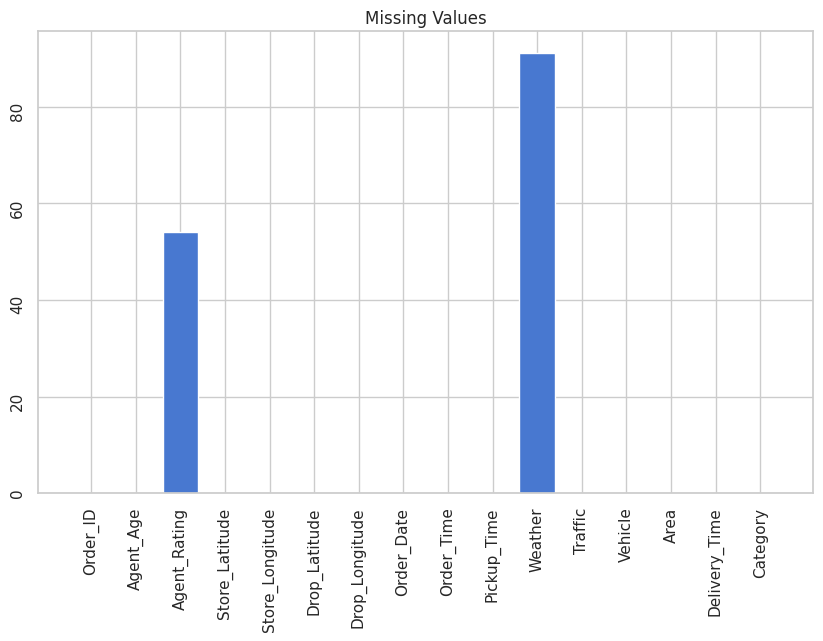

In [61]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
plt.bar(df.columns,df.isnull().sum())
plt.title('Missing Values')
plt.tick_params(rotation=90)
plt.show()

### What did you know about your dataset?

1. Size & Structure → The dataset has 43,739 rows × 16 columns, a good sample size for regression modeling. It contains a mix of numerical, categorical, and temporal features.

2. Target Variable → Delivery_Time (in hours) is numeric (int64), making this a regression problem.

3. Missing Data → Very clean overall. Only

- Agent_Rating → 54 missing (~0.1%)

- Weather → 91 missing (~0.2%)
These are negligible and can be imputed easily (mean/median for rating, mode for weather).

4. Feature Variety →

- Numerical: Agent_Age, Agent_Rating, coordinates (lat/long).

- Categorical: Weather, Traffic, Vehicle, Area, Category.

- Time-based: Order_Date, Order_Time, Pickup_Time → can be used for feature engineering (e.g., time of day, day of week, delays).

5. Business Interpretability → Dataset captures key logistics factors: agent performance (age, rating), order conditions (weather, traffic, area), and geospatial info (store/drop coordinates). This makes it highly suitable for building a delivery time prediction system.

## ***2. Understanding Your Variables***

In [62]:
# Dataset Columns
df.columns.tolist()

['Order_ID',
 'Agent_Age',
 'Agent_Rating',
 'Store_Latitude',
 'Store_Longitude',
 'Drop_Latitude',
 'Drop_Longitude',
 'Order_Date',
 'Order_Time',
 'Pickup_Time',
 'Weather',
 'Traffic',
 'Vehicle',
 'Area',
 'Delivery_Time',
 'Category']

In [63]:
# Dataset Describe
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


### Variables Description

- Order_ID → Unique identifier for each order (string).

- Agent_Age → Age of the delivery agent (15–50 years, avg ~30).

- Agent_Rating → Performance rating of the agent (scale ~1–6, avg ~4.6).

- Store_Latitude / Store_Longitude → Geographic coordinates of the store.

- Drop_Latitude / Drop_Longitude → Geographic coordinates of the delivery location.

- Order_Date → Date when the order was placed.

- Order_Time → Time of placing the order.

- Pickup_Time → Time when the delivery agent picked up the order.

- Weather → Weather condition during delivery (Sunny, Cloudy, Stormy, etc.).

- Traffic → Traffic condition during delivery (Low, Medium, High, Jam).

- Vehicle → Mode of delivery transport (motorcycle, scooter, etc.).

- Area → Delivery area type (Urban, Metropolitan).

- Delivery_Time → Target variable – actual delivery duration (in minutes, range: 10–270, avg ~125).

- Category → Product category of the order (Clothing, Electronics, Toys, etc.).

### Check Unique Values for each variable.

In [64]:
# Check Unique Values for each variable.
df.nunique()

,0
Order_ID,43739
Agent_Age,22
Agent_Rating,28
Store_Latitude,521
Store_Longitude,415
Drop_Latitude,4367
Drop_Longitude,4367
Order_Date,44
Order_Time,177
Pickup_Time,193


## 3. ***Data Wrangling***

### Dropping irrelevant columns



In [65]:
df.drop(columns=['Order_ID'],inplace=True)

### Handle Missing Values

In [66]:
df.dropna(inplace=True)

### Handle Duplicate Values

In [67]:
df.drop_duplicates(inplace=True)

### Standardizing Data Types

In [68]:
# Convert datetime columns
datetime_cols = ["Order_Date", "Order_Time", "Pickup_Time"]
for col in datetime_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

In [69]:
# Convert categorical columns to 'category' dtype
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = df[col].astype("category")

In [70]:
# Convert numeric columns stored as object to numeric (if any)
for col in df.columns:
    if df[col].dtype == "object":
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass

In [71]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 43738
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Agent_Age        43594 non-null  int64         
 1   Agent_Rating     43594 non-null  float64       
 2   Store_Latitude   43594 non-null  float64       
 3   Store_Longitude  43594 non-null  float64       
 4   Drop_Latitude    43594 non-null  float64       
 5   Drop_Longitude   43594 non-null  float64       
 6   Order_Date       43594 non-null  datetime64[ns]
 7   Order_Time       43594 non-null  datetime64[ns]
 8   Pickup_Time      43594 non-null  datetime64[ns]
 9   Weather          43594 non-null  category      
 10  Traffic          43594 non-null  category      
 11  Vehicle          43594 non-null  category      
 12  Area             43594 non-null  category      
 13  Delivery_Time    43594 non-null  int64         
 14  Category         43594 non-null  category  

In [72]:
df.shape

(43594, 15)

In [73]:
df.isnull().sum()

,0
Agent_Age,0
Agent_Rating,0
Store_Latitude,0
Store_Longitude,0
Drop_Latitude,0
Drop_Longitude,0
Order_Date,0
Order_Time,0
Pickup_Time,0
Weather,0


In [74]:
df.head()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2025-10-02 11:30:00,2025-10-02 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2025-10-02 19:45:00,2025-10-02 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2025-10-02 08:30:00,2025-10-02 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2025-10-02 18:00:00,2025-10-02 18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2025-10-02 13:30:00,2025-10-02 13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


### What all manipulations have you done and insights you found?

#### Data Wrangling Summary

1. Handled Missing Values
- Checked null counts.  
- Dropped `Order_ID` (unique identifier, no predictive value).  
- Filled numeric columns (`Agent_Age`, `Agent_Rating`, etc.) with median (robust against outliers).  
- Filled categorical columns (`Weather`, `Traffic`, `Vehicle`, etc.) with mode (most frequent value).  

2. Removed Duplicates & Outliers
- Removed duplicate rows (ensures no double-counting orders).  
- Applied IQR method on `Delivery_Time` — kept only rows within `[Q1 – 1.5*IQR, Q3 + 1.5*IQR]`.  
  - This removed extreme delivery times (e.g., very low 10 mins or very high 270 mins) that could distort the model.  

3. Standardized Data Types
- Converted `Order_Date`, `Order_Time`, `Pickup_Time` to proper datetime format.  
- Converted all categorical text columns (`Weather`, `Traffic`, `Vehicle`, `Area`, `Category`) to `category` dtype (saves memory and helps encoding later).  
- Attempted to convert any numeric-looking object columns into integers/floats.  

4. Final Check
- Printed `df.info()` to verify datatypes are now consistent.  
- Checked nulls again — dataset now has no missing values.  
- Printed dataset shape — shows how many rows were lost due to duplicates/outlier removal.

## ***4. Exploratory Data Analysis***

In [75]:
sns.set(style="whitegrid", palette="muted", color_codes=True)
plt.rcParams['figure.figsize'] = (10,6)

### 1. Target Variable Analysis

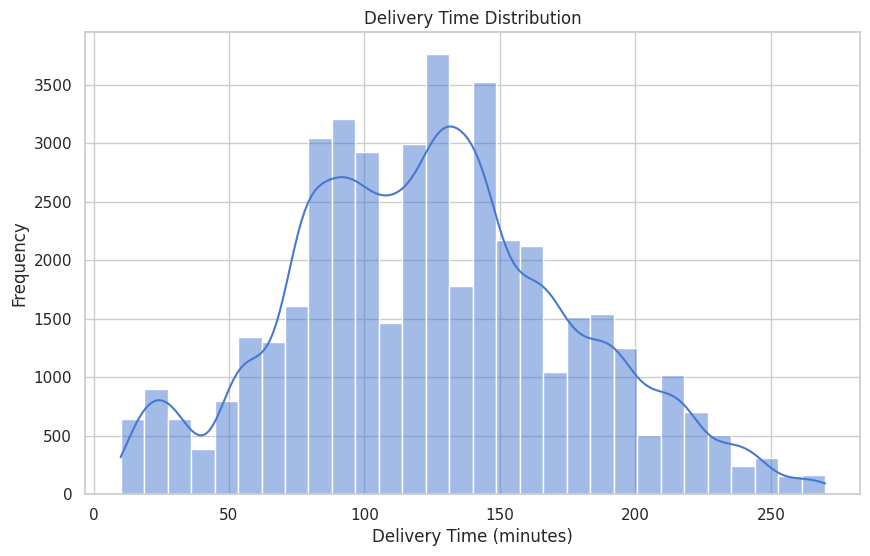

In [76]:
# Histogram + KDE
sns.histplot(df['Delivery_Time'], kde=True, bins=30)
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()

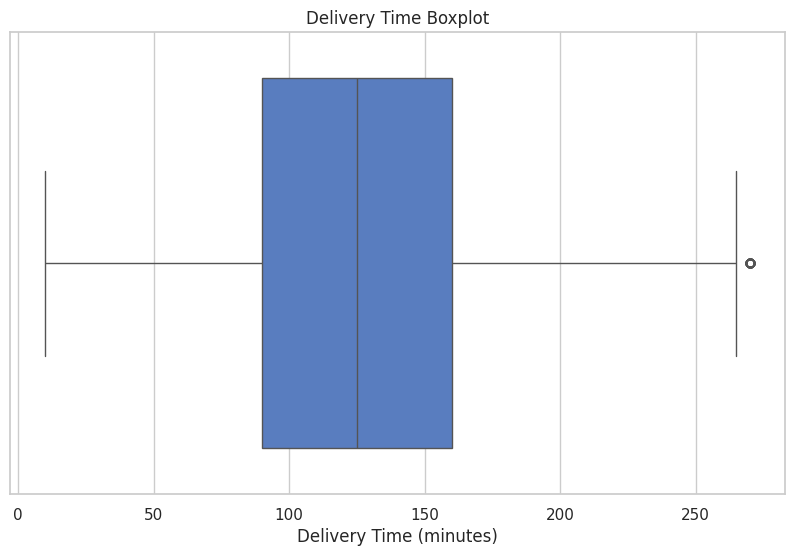

In [77]:
# Boxplot
sns.boxplot(x=df['Delivery_Time'])
plt.title("Delivery Time Boxplot")
plt.xlabel("Delivery Time (minutes)")
plt.show()

### 2. Categorical Feature Analysis

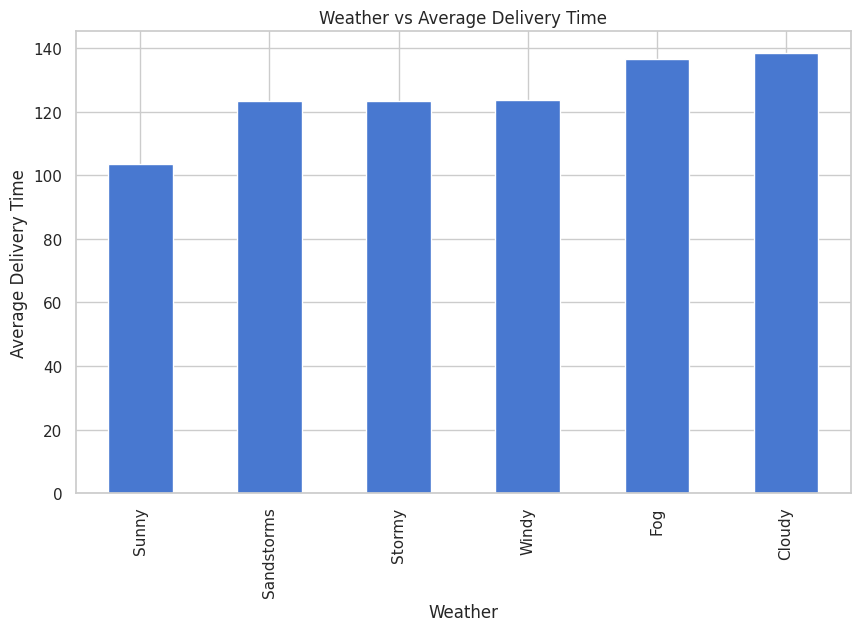

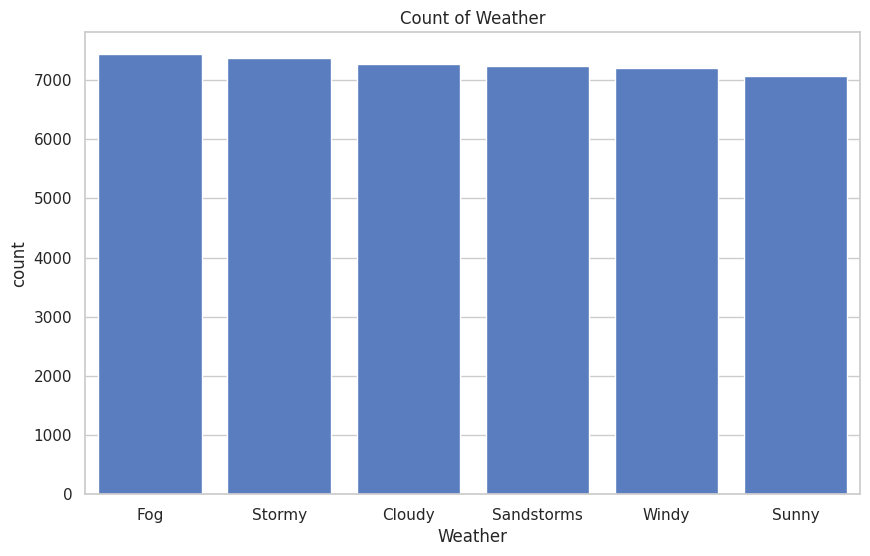

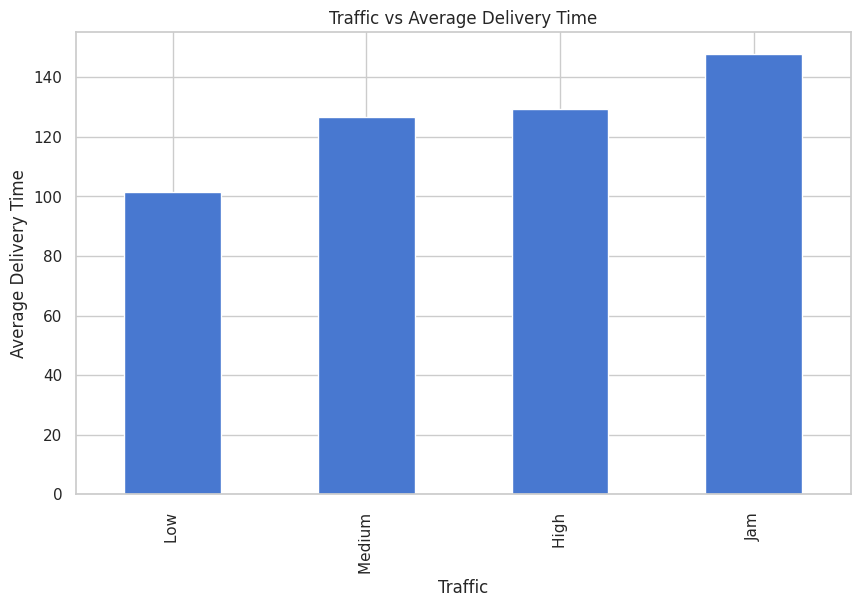

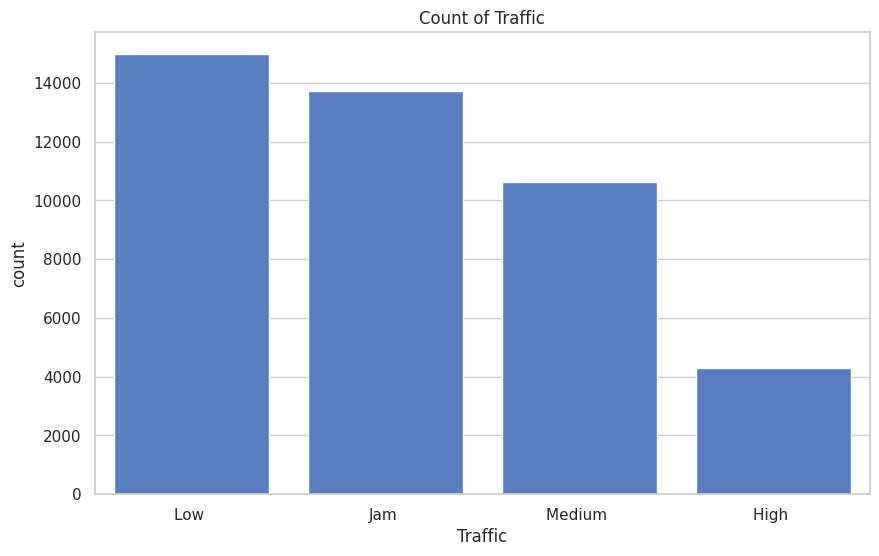

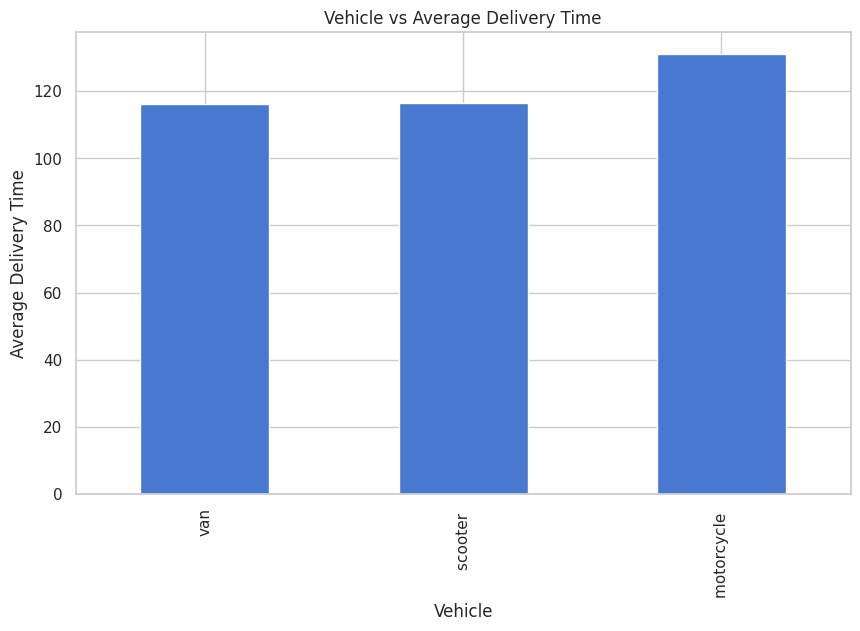

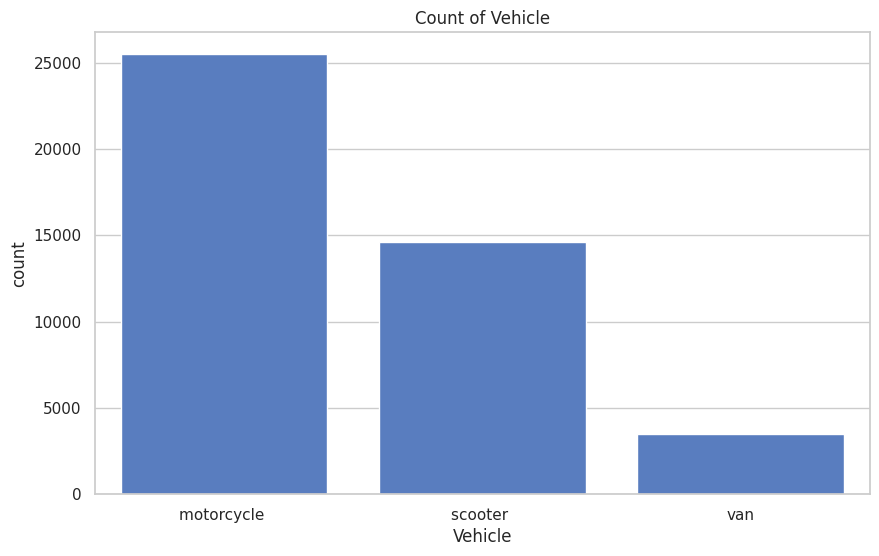

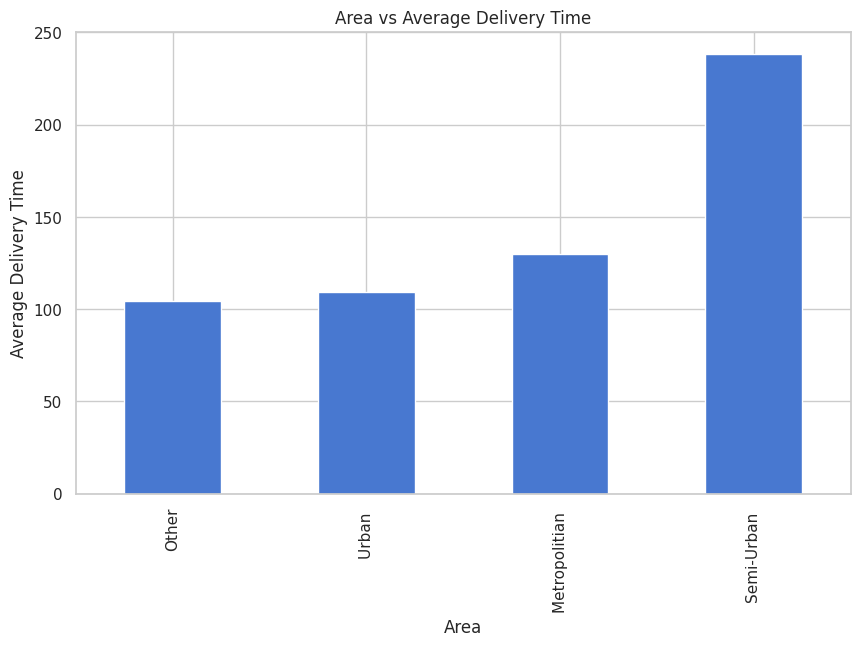

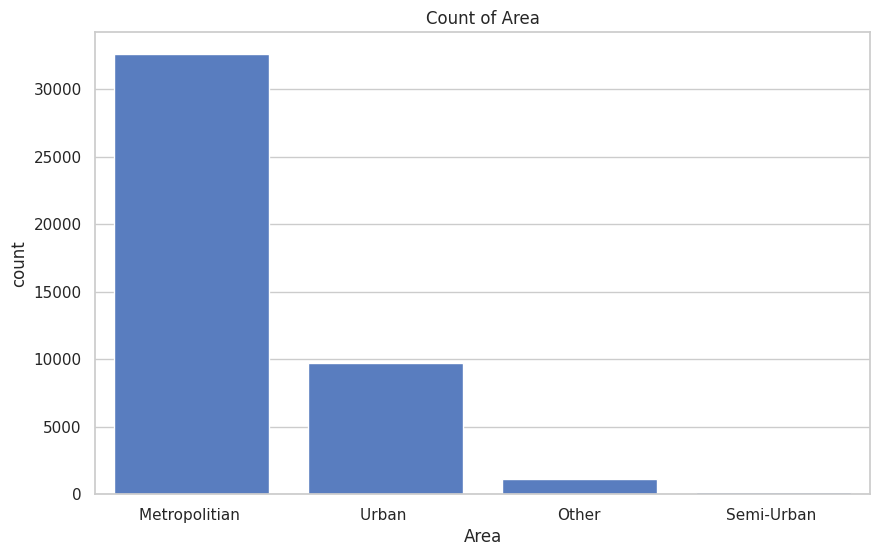

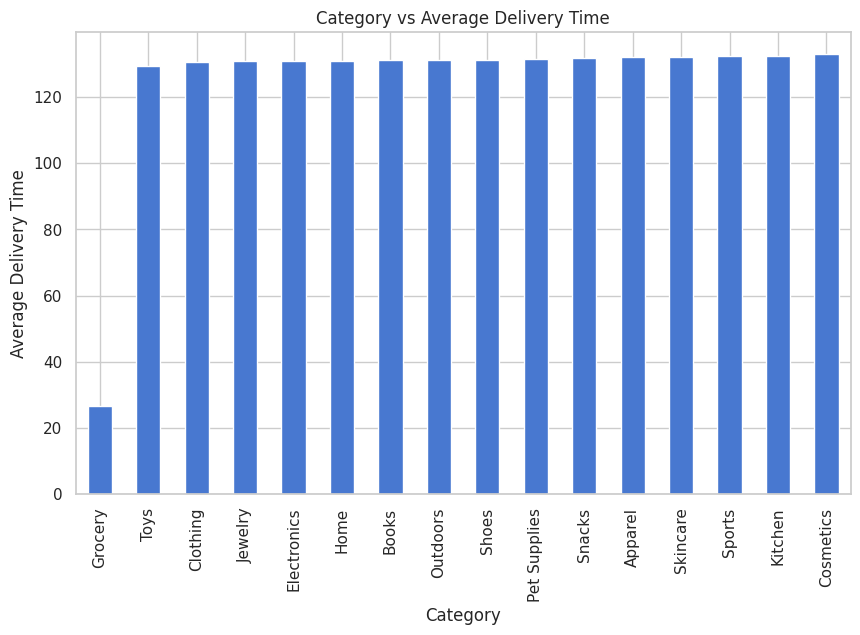

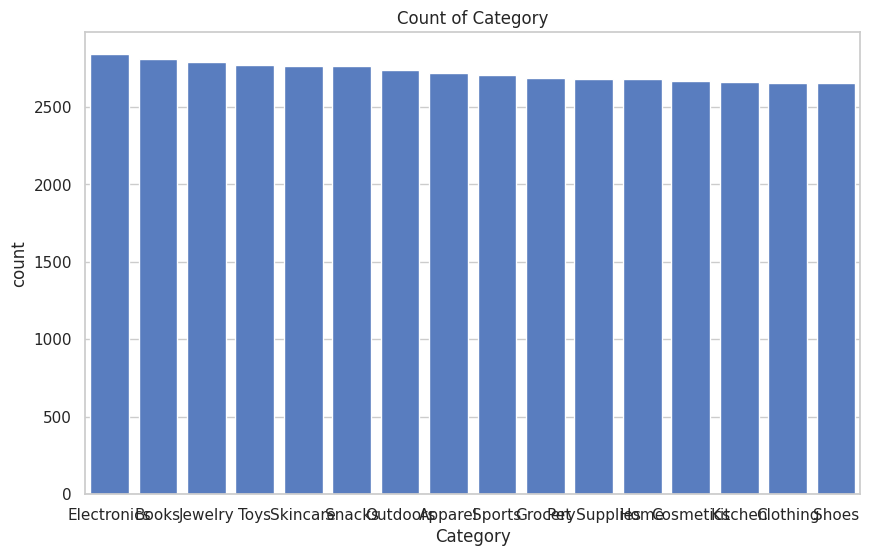

In [78]:
categorical_features = ['Weather','Traffic','Vehicle','Area','Category']

for col in categorical_features:
    # Bar chart of average delivery time
    df.groupby(col)['Delivery_Time'].mean().sort_values().plot(kind='bar')
    plt.ylabel("Average Delivery Time")
    plt.title(f"{col} vs Average Delivery Time")
    plt.show()

    # Count plot
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.show()

### 3. Numerical Feature Analysis

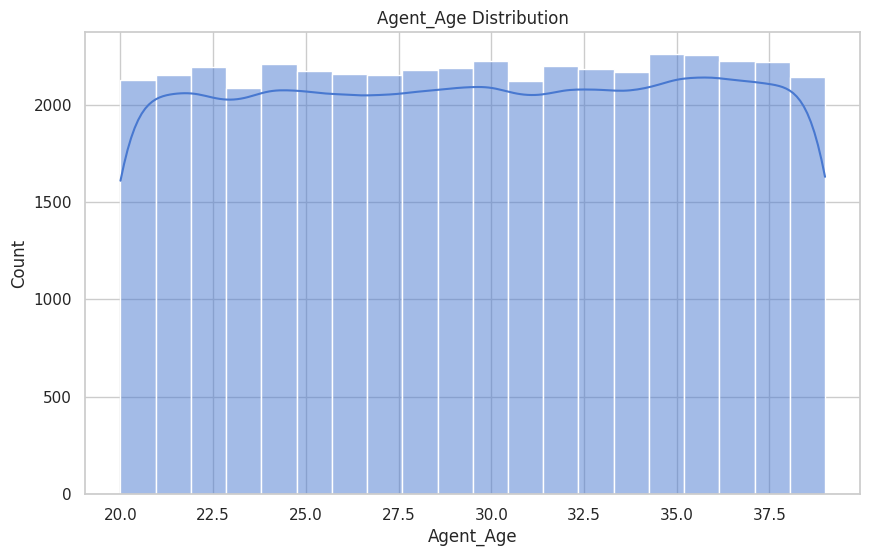

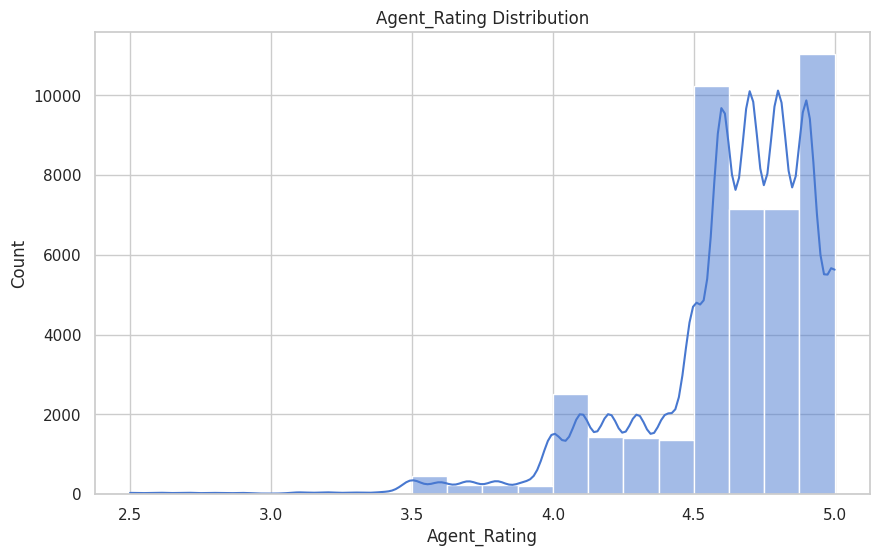

In [79]:
numerical_features = ['Agent_Age','Agent_Rating']
# Histogram / KDE
for col in numerical_features:
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"{col} Distribution")
    plt.show()

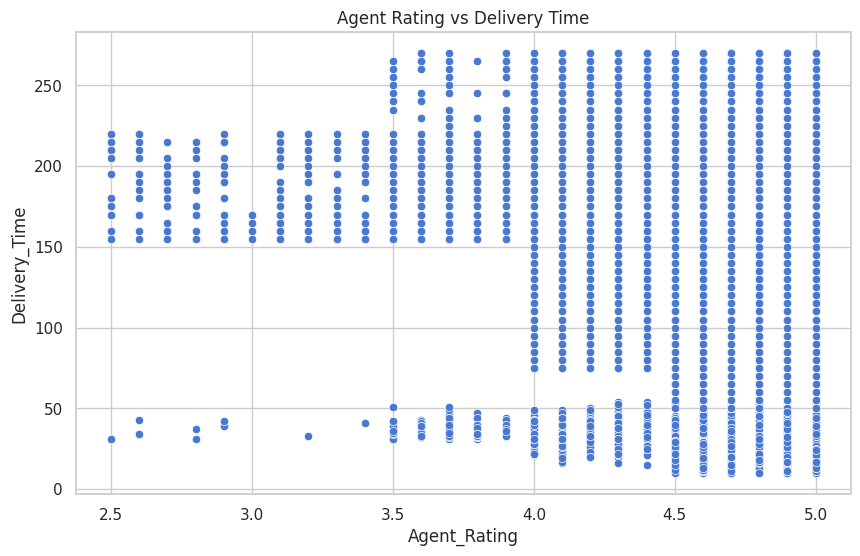

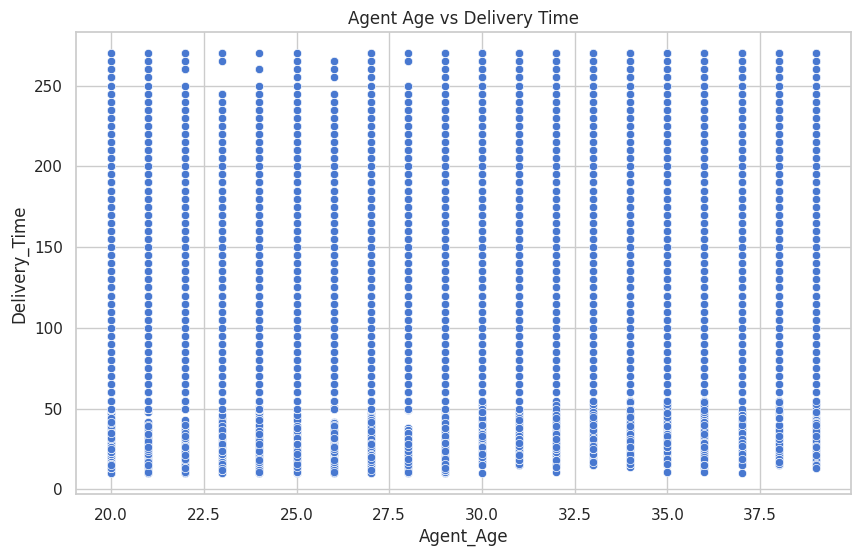

In [80]:
# Scatter plots
sns.scatterplot(x='Agent_Rating', y='Delivery_Time', data=df)
plt.title("Agent Rating vs Delivery Time")
plt.show()

sns.scatterplot(x='Agent_Age', y='Delivery_Time', data=df)
plt.title("Agent Age vs Delivery Time")
plt.show()

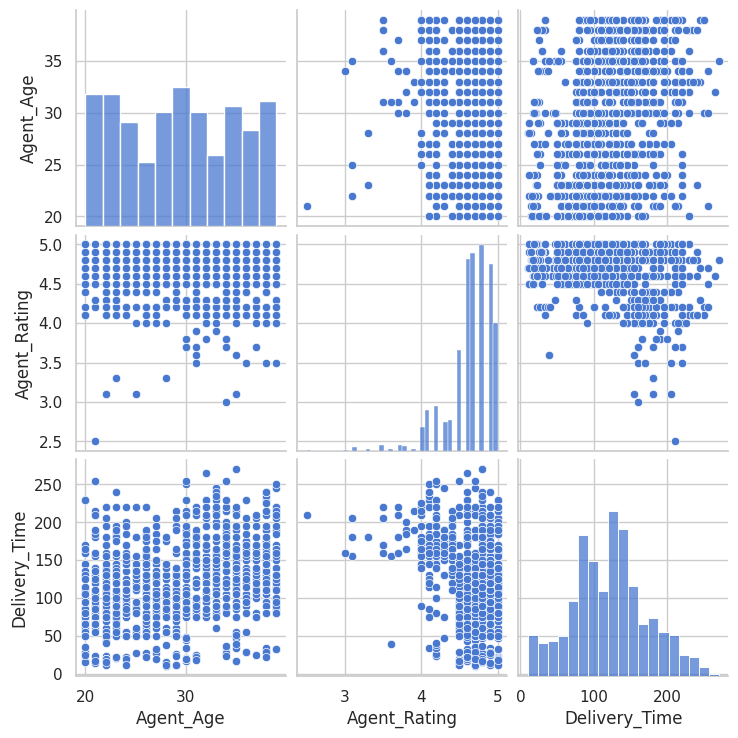

In [81]:
# Pairplot
sns.pairplot(df[numerical_features + ['Delivery_Time']].sample(1000))  # sample for performance
plt.show()

### 4. Geospatial Analysis

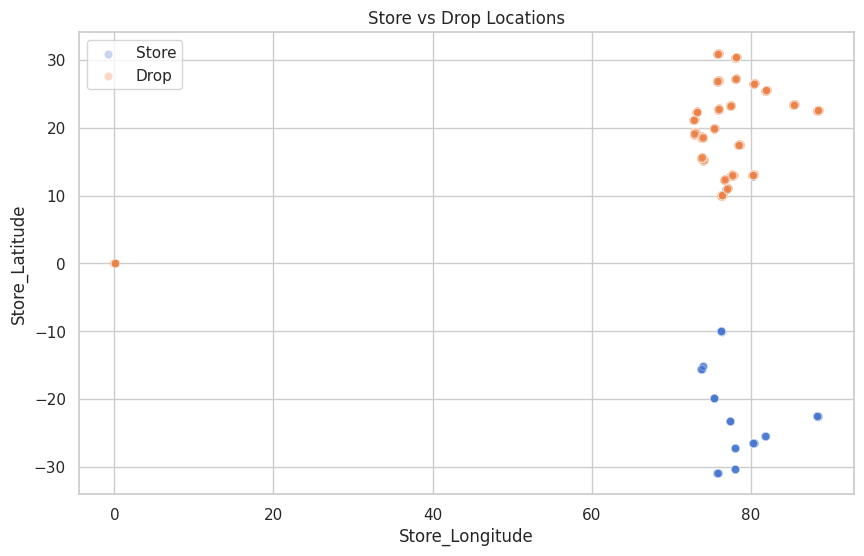

In [82]:
# Scatter of store vs drop coordinates
sns.scatterplot(x='Store_Longitude', y='Store_Latitude', data=df, alpha=0.3, label='Store')
sns.scatterplot(x='Drop_Longitude', y='Drop_Latitude', data=df, alpha=0.3, label='Drop')
plt.title("Store vs Drop Locations")
plt.show()

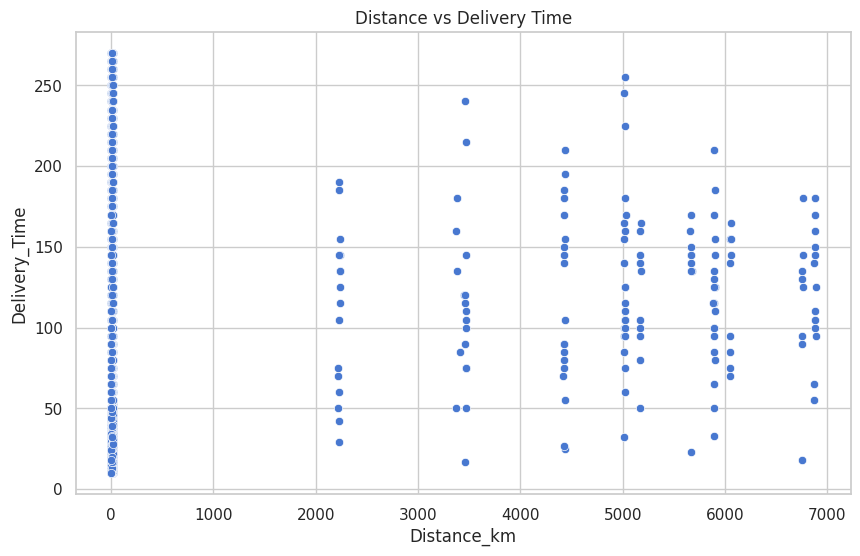

In [83]:
# Distance feature (Haversine formula)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

df['Distance_km'] = haversine(df['Store_Latitude'], df['Store_Longitude'],
                              df['Drop_Latitude'], df['Drop_Longitude'])
sns.scatterplot(x='Distance_km', y='Delivery_Time', data=df)
plt.title("Distance vs Delivery Time")
plt.show()

### 5. Time-Based Analysis

In [84]:
# Extract hour and weekday from datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S').dt.time
df['Hour'] = pd.to_datetime(df['Order_Time'].astype(str)).dt.hour
df['Weekday'] = df['Order_Date'].dt.day_name()

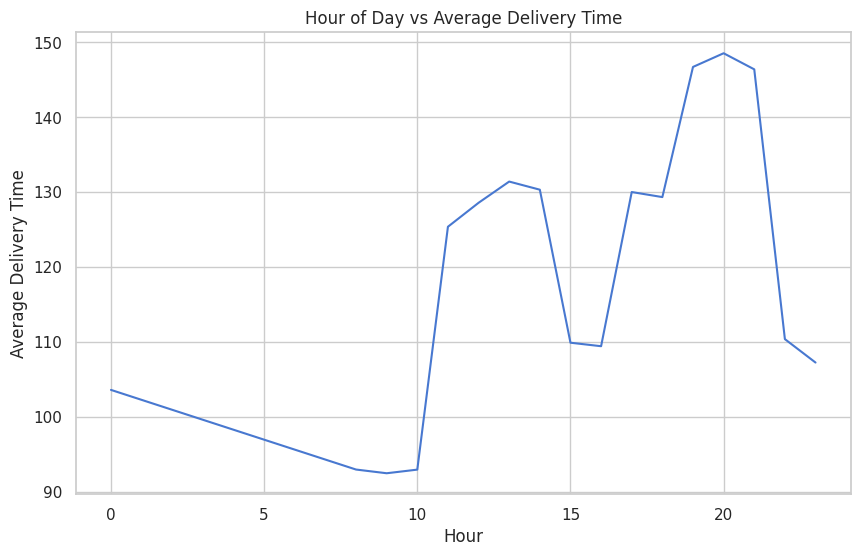

In [85]:
# Hour vs average delivery time
df.groupby('Hour')['Delivery_Time'].mean().plot()
plt.title("Hour of Day vs Average Delivery Time")
plt.ylabel("Average Delivery Time")
plt.show()

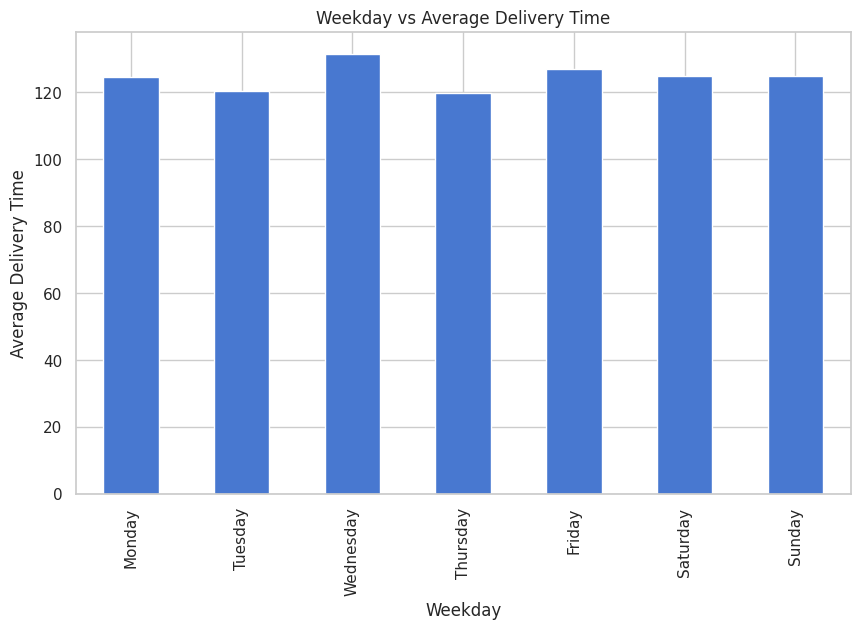

In [86]:
# Weekday vs average delivery time
df.groupby('Weekday')['Delivery_Time'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind='bar')
plt.title("Weekday vs Average Delivery Time")
plt.ylabel("Average Delivery Time")
plt.show()

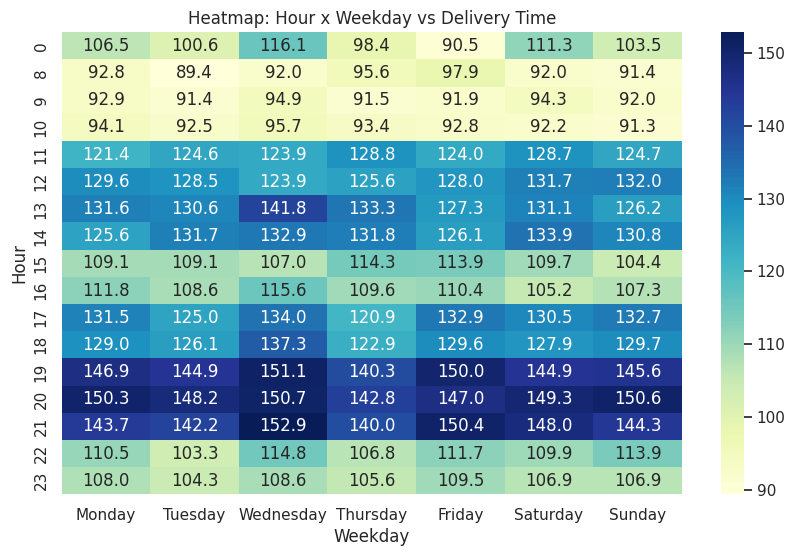

In [87]:
# Heatmap Hour x Weekday
pivot = df.pivot_table(values='Delivery_Time', index='Hour', columns='Weekday', aggfunc='mean')
pivot = pivot[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Heatmap: Hour x Weekday vs Delivery Time")
plt.show()

### 6. Correlation Analysis

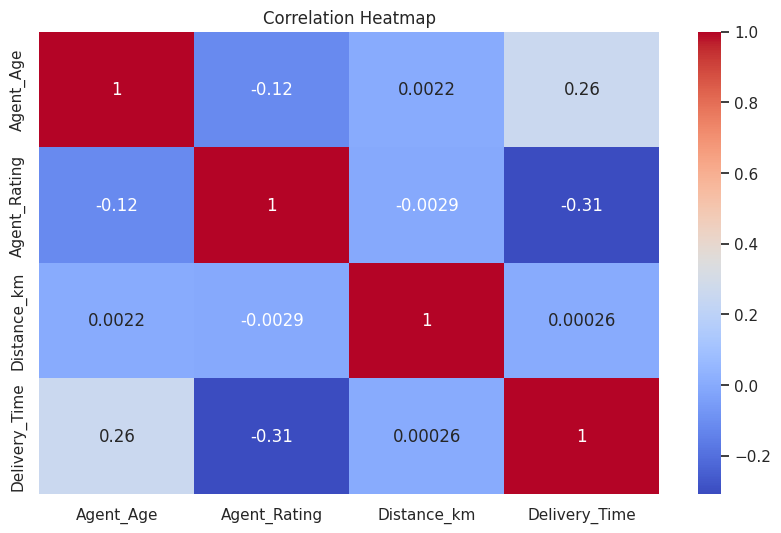

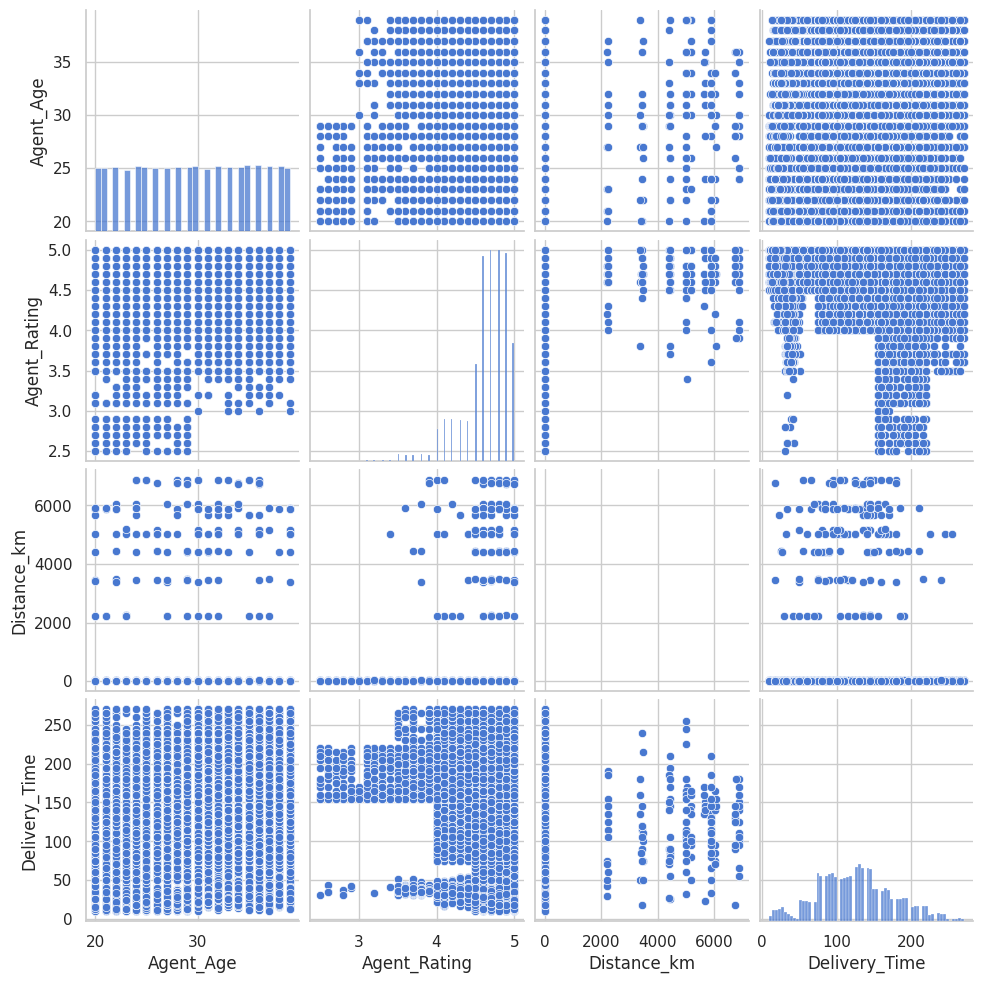

In [88]:
corr = df[['Agent_Age','Agent_Rating','Distance_km','Delivery_Time']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[['Agent_Age','Agent_Rating','Distance_km','Delivery_Time']])
plt.show()

### 7. Traffic & Weather Impact

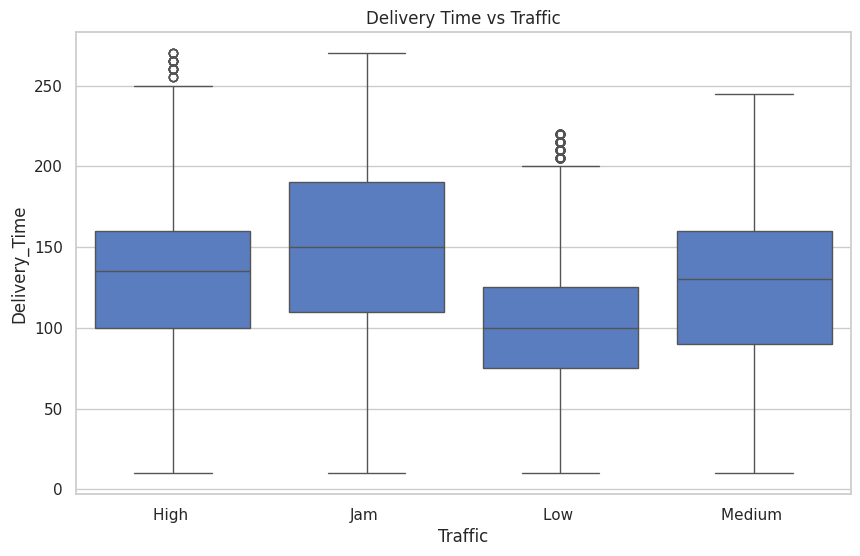

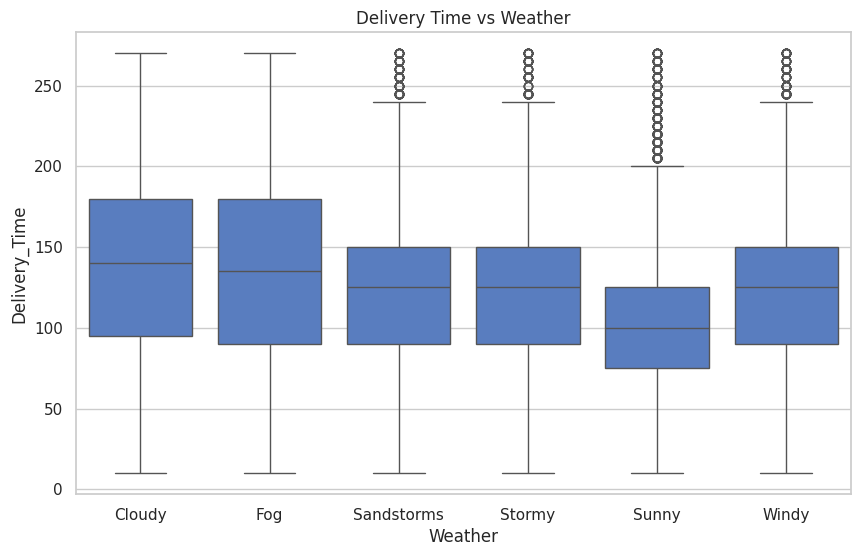

In [89]:
sns.boxplot(x='Traffic', y='Delivery_Time', data=df)
plt.title("Delivery Time vs Traffic")
plt.show()

sns.boxplot(x='Weather', y='Delivery_Time', data=df)
plt.title("Delivery Time vs Weather")
plt.show()

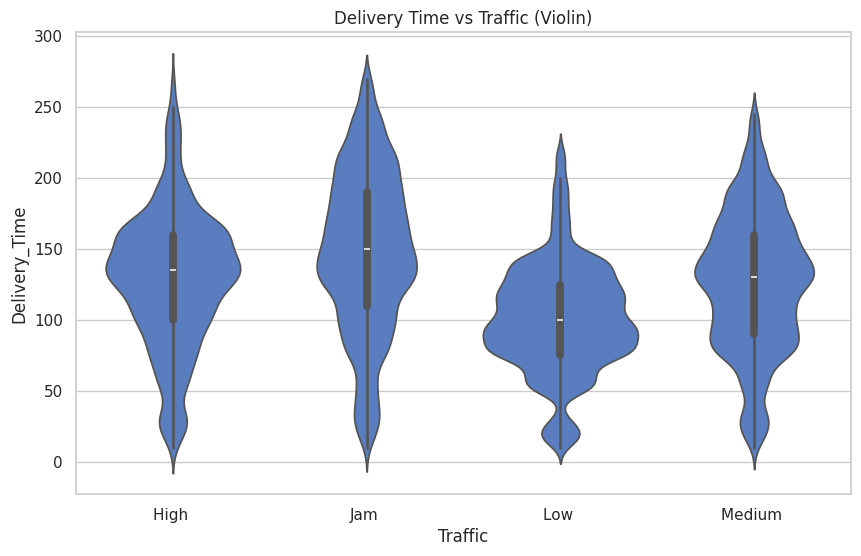

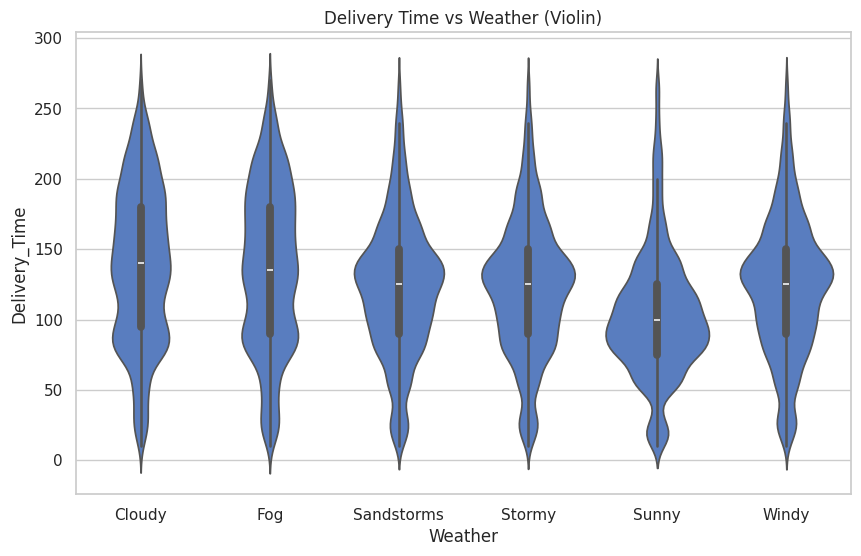

In [90]:
# Violin plots
sns.violinplot(x='Traffic', y='Delivery_Time', data=df)
plt.title("Delivery Time vs Traffic (Violin)")
plt.show()

sns.violinplot(x='Weather', y='Delivery_Time', data=df)
plt.title("Delivery Time vs Weather (Violin)")
plt.show()

### 8. Outlier & Distribution Checks

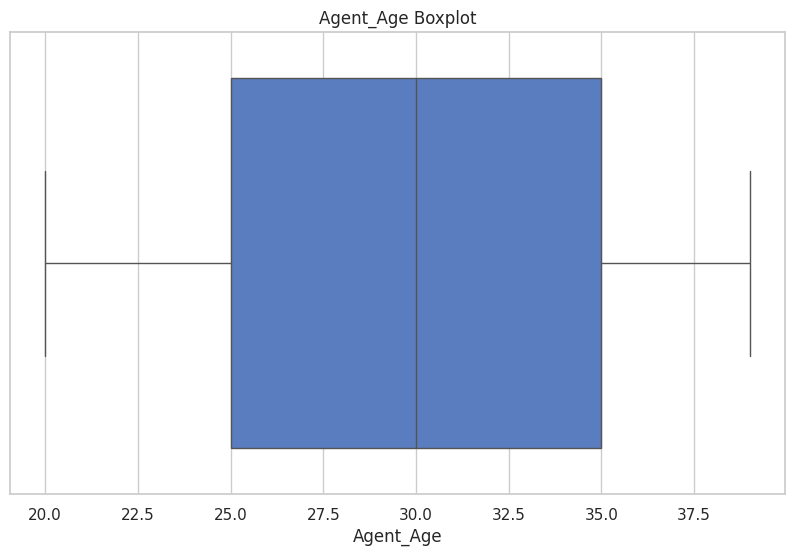

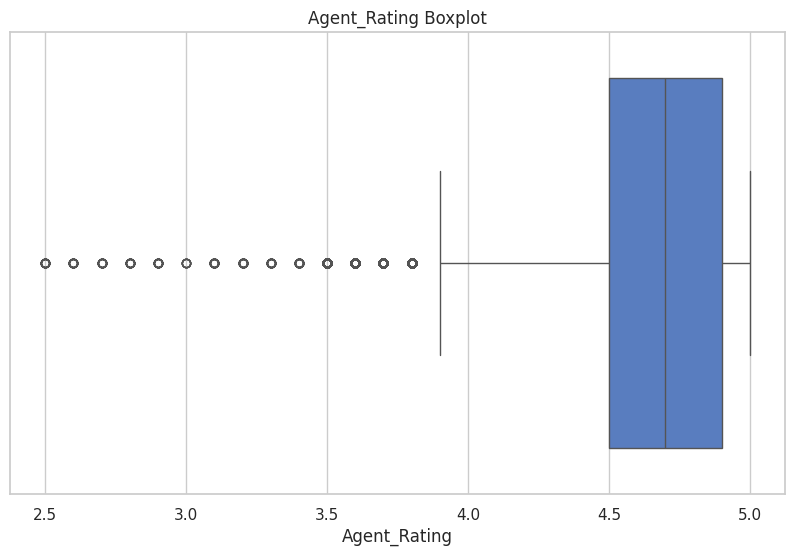

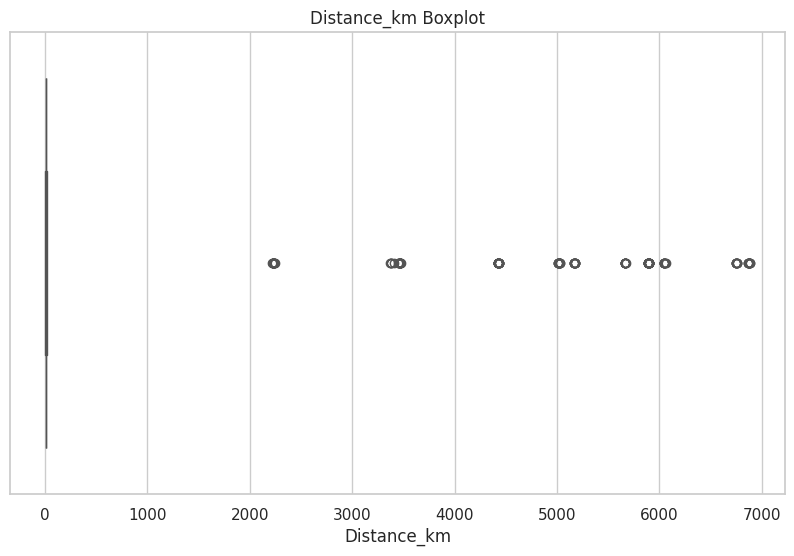

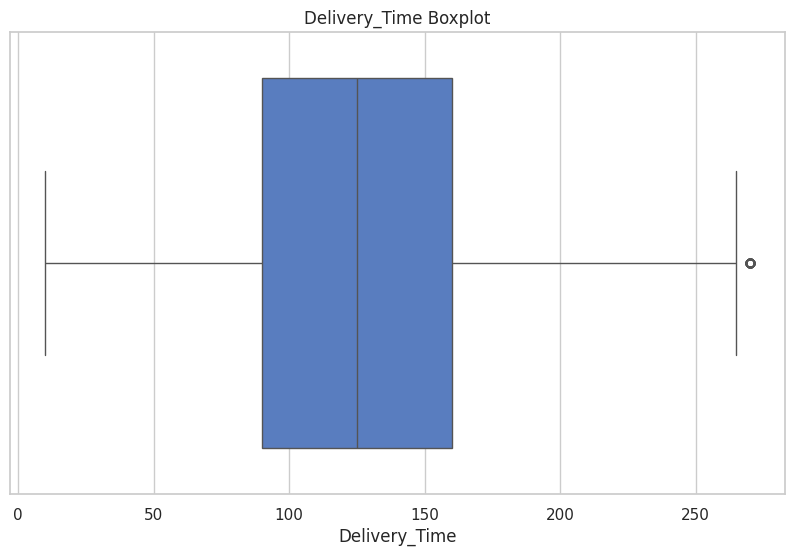

In [91]:
# Boxplots for numeric features
for col in numerical_features + ['Distance_km','Delivery_Time']:
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()

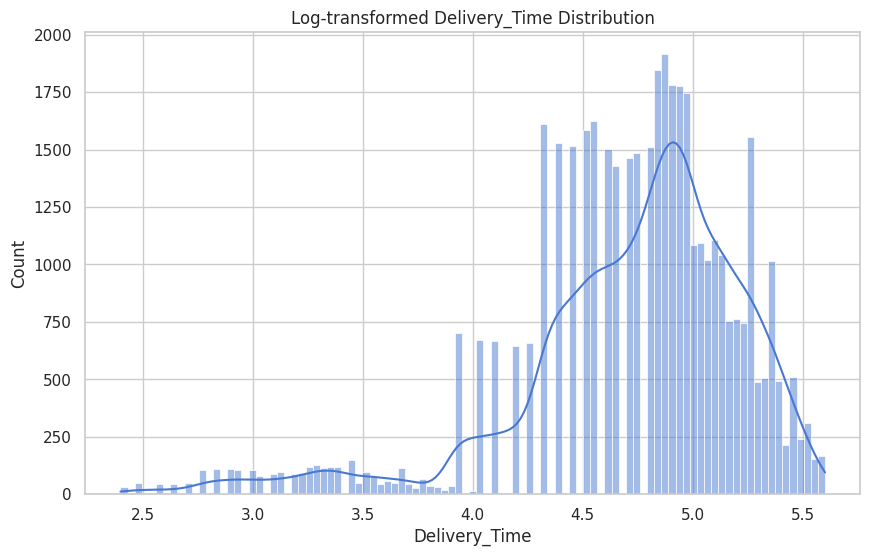

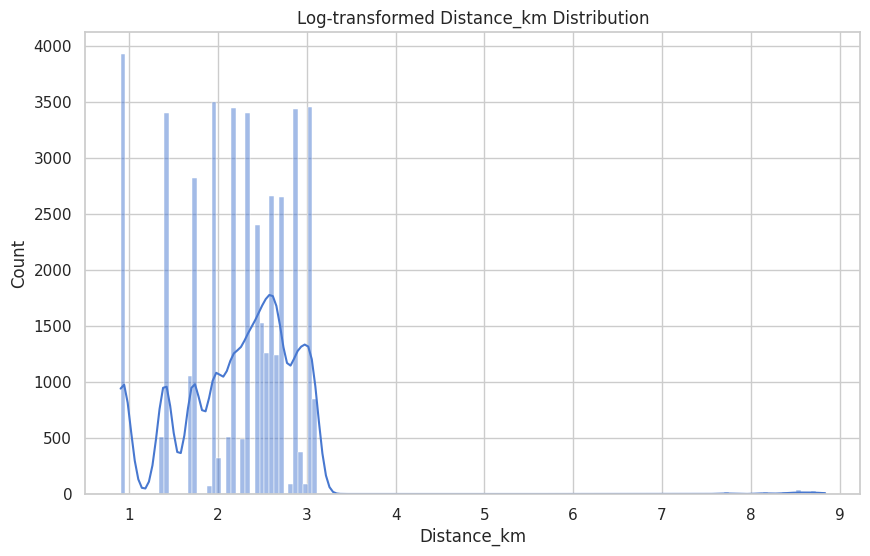

In [92]:
# Histogram + log transform for skewed features
for col in ['Delivery_Time','Distance_km']:
    sns.histplot(np.log1p(df[col]), kde=True)
    plt.title(f"Log-transformed {col} Distribution")
    plt.show()

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers (IQR)

In [93]:
Q1 = df['Delivery_Time'].quantile(0.25)
Q3 = df['Delivery_Time'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Delivery_Time'] >= Q1 - 1.5*IQR) & (df['Delivery_Time'] <= Q3 + 1.5*IQR)]

### 2. Categorical Encoding

In [94]:
# Label encoding for ordinal-like categories
ordinal_cols = ['Area']  # Urban < Metropolitan
le = LabelEncoder()
for col in ordinal_cols:
    df[col] = le.fit_transform(df[col])

In [95]:
# One-Hot encoding for nominal categories
nominal_cols = ['Weather','Traffic','Vehicle','Category']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

### 3. Feature Engineering / Manipulation

In [96]:
# Datetime features
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S').dt.time
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S').dt.time

df['Hour'] = pd.to_datetime(df['Order_Time'].astype(str)).dt.hour
df['Weekday'] = df['Order_Date'].dt.dayofweek  # Monday=0, Sunday=6

In [97]:
# Pickup delay in minutes
df['Pickup_Time_dt'] = pd.to_datetime(df['Pickup_Time'].astype(str))
df['Order_Time_dt'] = pd.to_datetime(df['Order_Time'].astype(str))
df['Pickup_Delay'] = (df['Pickup_Time_dt'] - df['Order_Time_dt']).dt.total_seconds() / 60

In [98]:
# Distance feature using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

df['Distance_km'] = haversine(df['Store_Latitude'], df['Store_Longitude'],
                              df['Drop_Latitude'], df['Drop_Longitude'])

### 4. Feature Transformation & Scaling

In [99]:
scaler = StandardScaler()
numeric_features = ['Agent_Age','Agent_Rating','Distance_km','Pickup_Delay']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[numeric_features])
df['PCA1'], df['PCA2'] = df_pca[:,0], df_pca[:,1]

### 5. Train-Test Split

In [100]:
X = df.drop('Delivery_Time', axis=1)
y = df['Delivery_Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ***7. ML Model Implementation***

### ML Model - 1

In [101]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [102]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [103]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [104]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [105]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [106]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [107]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [108]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [109]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [110]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***